In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
%matplotlib inline

In [2]:
columns = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Arrival_Date', 'Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']

def getRoot(path):
    tree = ET.parse(path)
    return tree.getroot()

def getTables(root):
    return root.findall('.//NewDataSet')[0].getchildren()

In [3]:
files = ['Tomato_2014.xml', 'Tomato_2015.xml', 'Tomato_2016.xml']
tables = []
for f in files:
    root = getRoot(f)
    tables += getTables(root)


/home/nishant/venvs/data-munging/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


In [4]:
rows = []
for table in tables:
    row = [col.text for col in table.getchildren()]
    rows.append(row)

/home/nishant/venvs/data-munging/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()


In [5]:
df = pd.DataFrame(columns=columns)
df = df.append(pd.DataFrame(rows, columns=columns), ignore_index=True)

In [6]:
df.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,01/01/2014,100,300,200
1,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,02/01/2014,100,300,200
2,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,03/01/2014,100,300,200
3,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,04/01/2014,100,300,200
4,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,05/01/2014,100,200,200


In [7]:
df.Min_x0020_Price = df.Min_x0020_Price.astype(float)
df.Max_x0020_Price = df.Max_x0020_Price.astype(float)
df.Modal_x0020_Price = df.Modal_x0020_Price.astype(float)

In [8]:
df.Arrival_Date = pd.to_datetime(df['Arrival_Date']).dt.to_period('M')
df.Arrival_Date

0        2014-01
1        2014-02
2        2014-03
3        2014-04
4        2014-05
5        2014-06
6        2014-07
7        2014-08
8        2014-09
9        2014-10
10       2014-11
11       2014-12
12       2014-01
13       2014-01
14       2014-01
15       2014-01
16       2014-01
17       2014-01
18       2014-01
19       2014-01
20       2014-01
21       2014-01
22       2014-01
23       2014-01
24       2014-01
25       2014-01
26       2014-01
27       2014-01
28       2014-01
29       2014-01
           ...  
364642   2016-10
364643   2016-10
364644   2016-10
364645   2016-10
364646   2016-10
364647   2016-10
364648   2016-10
364649   2016-10
364650   2016-10
364651   2016-10
364652   2016-10
364653   2016-10
364654   2016-02
364655   2016-04
364656   2016-05
364657   2016-06
364658   2016-07
364659   2016-08
364660   2016-10
364661   2016-11
364662   2016-12
364663   2016-11
364664   2016-11
364665   2016-11
364666   2016-11
364667   2016-11
364668   2016-11
364669   2016-

In [15]:
lookup = {
    11: 'Winter',
    12: 'Winter',
    1: 'Winter',
    2: 'Spring',
    3: 'Spring',
    4: 'Spring',
    5: 'Summer',
    6: 'Summer',
    7: 'Summer',
    8: 'Autumn',
    9: 'Autumn',
    10: 'Autumn'
}

def groupby_season(row):
    return lookup[row.month] 

df["season"] = df['Arrival_Date'].apply(groupby_season)

In [17]:
df.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,season
0,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,2014-01,100.0,300.0,200.0,Winter
1,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,2014-02,100.0,300.0,200.0,Spring
2,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,2014-03,100.0,300.0,200.0,Spring
3,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,2014-04,100.0,300.0,200.0,Spring
4,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,2014-05,100.0,200.0,200.0,Summer


In [61]:
grouped_by_season_state = df.groupby([df.Arrival_Date.dt.year, 'season', 'tate']).mean()
grouped_by_season_state

Min_x0020_Price  Max_x0020_Price  \
Arrival_Date season State                                                   
2014         Autumn Andhra Pradesh           1104.518219      1533.365722   
                    Assam                    2675.974843      3032.075472   
                    Chandigarh               1187.500000      2695.000000   
                    Gujarat                  1646.900300      2237.207646   
                    Haryana                  1808.801256      2299.182663   
                    Himachal Pradesh         1647.465000      2456.766250   
                    Jammu and Kashmir        1982.524272      2432.038835   
                    Jharkhand                2796.235495      3234.257679   
                    Karnataka                 758.696769      1387.986744   
                    Kerala                   2073.008429      2421.452972   
                    Madhya Pradesh           1030.826476      1750.928444   
                    Maharashtra              1246.455261      2126.740873   
                    Meghalaya                2438.000000      3214.000000   
                    Mizoram                  3100.000000      3314.285714   
                    NCT of Delhi             1410.055319      2510.068085   
                    Nagaland                 4141.379310      4636.781609   
                    Orissa                   2722.220418      3161.218760   
                    Punjab                   1864.590782      2318.534318   
                    Rajasthan                1561.177474      2245.511945   
                    Telangana                 706.487288      1085.040254   
                    Tripura                  3683.582090      4097.014925   
                    Uttar Pradesh            1436.772818      1558.200748   
                    Uttrakhand               1416.381125      2007.716878   
                    West Bengal              2956.910966      3193.355049   
             Spring Andhra Pradesh            611.489032       855.021935   
                    Assam                    1431.782946      1696.511628   
                    Chandigarh                538.461538      1579.487179   
                    Gujarat                   668.174859       975.539887   
                    Haryana                   948.823072      1271.374456   
                    Himachal Pradesh         1264.490035      1637.143025   
...                                                  ...              ...   
2016         Summer Uttar Pradesh             787.939290       835.652099   
                    Uttrakhand                913.068389      1204.281155   
                    West Bengal              2860.002925      3159.076548   
             Winter Andaman and Nicobar      6684.210526      8894.736842   
                    Andhra Pradesh           1072.274585      1506.846743   
                    Assam                    1804.326923      2135.096154   
                    Bihar                    3500.000000      4800.000000   
                    Chandigarh                917.948718      1928.205128   
                    Chattisgarh               997.191358      1164.660494   
                    Gujarat                   929.030151      1384.522613   
                    Haryana                  1354.146105      1740.271158   
                    Himachal Pradesh         1333.908046      1985.344828   
                    Jammu and Kashmir        1901.636364      2213.409091   
                    Jharkhand                1527.921941      1910.379747   
                    Karnataka                 821.771429      1479.616883   
                    Kerala                   2254.265369      2619.934426   
                    Madhya Pradesh            813.612033      1251.899378   
                    Maharashtra               774.050597      1352.047186   
                    Meghalaya                2120.512821      2728.205128   
                    Mizoram          

In [88]:
unstacked_season = grouped_by_season_state.unstack('season')
unstacked_season

Min_x0020_Price                            \
season                                    Autumn       Spring       Summer   
Arrival_Date State                                                           
2014         Andhra Pradesh          1104.518219   611.489032  1425.365019   
             Assam                   2675.974843  1431.782946  1790.178571   
             Chandigarh              1187.500000   538.461538   888.000000   
             Gujarat                 1646.900300   668.174859  1685.836000   
             Haryana                 1808.801256   948.823072  1045.909609   
             Himachal Pradesh        1647.465000  1264.490035  1062.103604   
             Jammu and Kashmir       1982.524272  1486.383929  1389.558233   
             Jharkhand               2796.235495  1281.294118  1943.588028   
             Karnataka                758.696769   454.527902   925.573005   
             Kerala                  2073.008429  1425.586504  2271.086470   
             Madhya Pradesh          1030.826476   616.266968   978.256637   
             Maharashtra             1246.455261   659.895626  1303.994928   
             Meghalaya               2438.000000  1822.222222  1588.235294   
             Mizoram                 3100.000000  2575.000000  2325.000000   
             NCT of Delhi            1410.055319   724.498168   854.325397   
             Nagaland                4141.379310  2570.512821  2682.926829   
             Orissa                  2722.220418  1358.968551  2646.016320   
             Punjab                  1864.590782  1108.971177  1061.532015   
             Rajasthan               1561.177474   855.145631  1229.178082   
             Telangana                706.487288   464.873563  1089.991429   
             Tripura                 3683.582090  1683.018868  2795.384615   
             Uttar Pradesh           1436.772818   719.389392   805.302195   
             Uttrakhand              1416.381125   844.854722   762.951311   
             West Bengal             2956.910966  1189.453058  2394.696429   
2015         Andaman and Nicobar     5694.444444  6000.000000  5166.666667   
             Andhra Pradesh          1023.158690   794.333973  1345.300765   
             Assam                   2096.276596  1270.569620  1811.151079   
             Bihar                   3846.153846  2442.857143  2890.000000   
             Chandigarh               747.272727   669.104478   637.735849   
             Chattisgarh              944.000000   972.500000   842.857143   
...                                          ...          ...          ...   
             Uttar Pradesh            846.203860   864.652603   877.142857   
             Uttrakhand              1090.359584   908.938218   914.861582   
             West Bengal             2529.577102  1395.346687  2435.929796   
2016         Andaman and Nicobar     8228.571429  5985.294118  8648.148148   
             Andhra Pradesh           881.056637   866.956561  1938.787665   
             Assam                   2339.565217  1585.611511  1964.227642   
             Bihar                   3250.000000  4181.818182  3958.333333   
             Chandigarh              1010.958904   672.058824  1243.478261   
             Chattisgarh             1268.317757   783.084577  1861.320755   
             Gujarat                  969.875195   794.907010  1756.261356   
             Haryana                 1413.917222  1086.575621  1550.577041   
             Himachal Pradesh        1089.624329  1320.349076  1536.557845   
             Jammu and Kashmir       1935.416667  1867.507508  2230.988024   
             Jharkhand               1999.430657  1265.486486  2020.391517   
             Karnataka                577.167969   656.345088  1434.643077   
             Kerala                  1886.998525  1938.308824  3453.904794   
             Madhya Pradesh           817.184946   657.449228  1170.574116   
             Maharashtra              665.324925   657.

In [93]:
yr_2014 = unstacked_season.ix[(2014,'Andhra Pradesh'), ('Min_x0020_Price')]
yr_2015 = unstacked_season.ix[(2015,'Andhra Pradesh'), ('Min_x0020_Price')]
yr_2016 = unstacked_season.ix[(2016,'Andhra Pradesh'), ('Min_x0020_Price')]

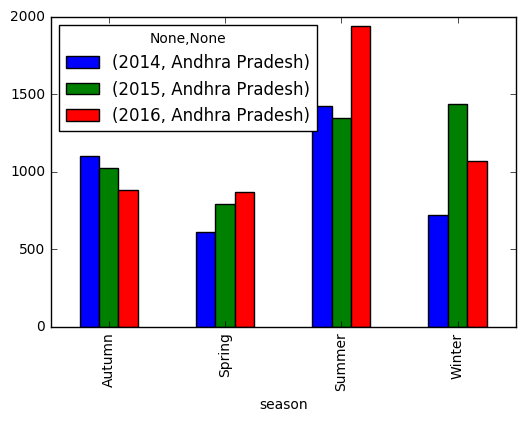

In [99]:
pd.concat([yr_2014, yr_2015, yr_2016], axis=1).plot(kind='bar')